In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval
import os

In [2]:
# Get the current directory
current_dir = os.getcwd()
# Construct the relative file path based on the current directory
folder_path_instances = os.path.join(current_dir, 'Data', 'Instances', 'Uerze')

# Read the CSV file using the relative file path
pobj_warmsen = pd.read_csv(folder_path_instances + '/post_order_id_mapping.dat', sep='\t', names=('PostObjectId', 'RoutePosID'))
ppoint_warmsen = pd.read_csv(folder_path_instances + '/post_point_information.dat', sep='\t', names=('PostPointId', 'PostObjectId'))

In [3]:
# Convert 'PostObjectId' column from string to list
ppoint_warmsen['PostObjectId'] = ppoint_warmsen['PostObjectId'].apply(literal_eval)

# Use explode() to split the "PostObjectId" column into different rows
ppoint_warmsen = ppoint_warmsen.explode('PostObjectId', ignore_index=True)
print(ppoint_warmsen.head(10))

   PostPointId PostObjectId
0            0            0
1            1            1
2            2            2
3            2         4253
4            3            3
5            3          538
6            4            4
7            5            5
8            5         4838
9            6            6


In [4]:
# Merge post_order_id_mapping.dat and post_point_information.dat using 'RoutePosID' as the common column
merged_data = pd.merge(ppoint_warmsen, pobj_warmsen, on='PostObjectId', how = 'outer')
print(merged_data.head(10))

   PostPointId PostObjectId                        RoutePosID
0            0            0                               NaN
1            1            1                               NaN
2            2            2                               NaN
3            2         4253  17003B5C1A57B03B2CFC29A8904FDBCB
4            3            3                               NaN
5            3          538  F48CB0C28F0E117AE030007F0100574C
6            4            4                               NaN
7            5            5                               NaN
8            5         4838  F48CB0C33239117AE030007F0100574C
9            6            6                               NaN


In [5]:
# Define a list of file paths for multiple data sets
folder_path_volumes = os.path.join(current_dir, 'Data', 'Volumes')
dfs = []

for file_name in os.listdir(folder_path_volumes):
    if file_name.endswith('.csv'): # Check if the file has .csv extension
        file_path = os.path.join(folder_path_volumes, file_name) # Create full file
        df = pd.read_csv(file_path, sep=';')
        df = df.rename(columns={'ROUTEPOS_ID': 'RoutePosID',
                                'BRIEFE': 'Letters',
                                'PAKETE': 'Packets',
                                'SONSTIGE': 'Others'})

        day = file_path[-6:-4]
        df['Days'] = day
        dfs.append(df)

volumes_dp = pd.concat(dfs, ignore_index=True)
print(volumes_dp)

                               RoutePosID  Letters  Packets  Others Days
0        61ADE0B658BD7433E040400A0913386C  1.38250  0.16450   0.085   di
1        6F994C12508952C82A3BD63E30AA0606  1.38250  0.16450   0.085   di
2        D6590A6EA73C629B096242214AB6FA85  1.38250  0.16450   0.085   di
3        00F6207EED20EAE0E040007F01000C8B  0.78375  0.23125   0.100   di
4        30B7851A725D50BBE040400A09130368  0.78375  0.23125   0.100   di
...                                   ...      ...      ...     ...  ...
4527373  F48CB0CD5303117AE030007F0100574C  1.05200  0.27000   0.512   sa
4527374  F48CB0CD5304117AE030007F0100574C  1.05200  0.27000   0.512   sa
4527375  F48CB0CD5305117AE030007F0100574C  1.05200  0.27000   0.512   sa
4527376  F48CB0CD5306117AE030007F0100574C  1.05200  0.27000   0.512   sa
4527377  F48CB0CD5307117AE030007F0100574C  1.05200  0.27000   0.512   sa

[4527378 rows x 5 columns]


In [6]:
#extracting only warmsen data from the volume database
merged_data = pd.merge(merged_data, volumes_dp, on='RoutePosID', how='left')
print(merged_data.head(10))

   PostPointId PostObjectId                        RoutePosID  Letters  \
0            0            0                               NaN      NaN   
1            1            1                               NaN      NaN   
2            2            2                               NaN      NaN   
3            2         4253  17003B5C1A57B03B2CFC29A8904FDBCB   0.0300   
4            2         4253  17003B5C1A57B03B2CFC29A8904FDBCB   0.0325   
5            2         4253  17003B5C1A57B03B2CFC29A8904FDBCB   0.0350   
6            2         4253  17003B5C1A57B03B2CFC29A8904FDBCB   0.0525   
7            2         4253  17003B5C1A57B03B2CFC29A8904FDBCB   0.0075   
8            2         4253  17003B5C1A57B03B2CFC29A8904FDBCB   0.0300   
9            3            3                               NaN      NaN   

   Packets  Others Days  
0      NaN     NaN  NaN  
1      NaN     NaN  NaN  
2      NaN     NaN  NaN  
3   0.0575     0.0   di  
4   0.0200     0.0   do  
5   0.0100     0.0   fr  
6  

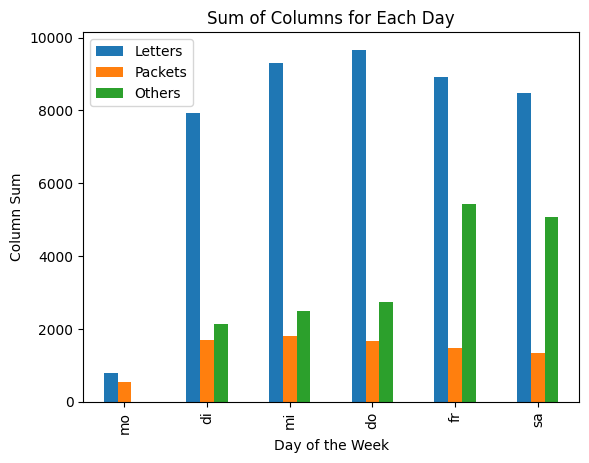

In [7]:
desired_order = ['mo', 'di', 'mi', 'do', 'fr', 'sa']
# Group the combined dataframe by day of the week and calculate the sum for multiple columns
column_sum_df = merged_data.groupby('Days')[['Letters', 'Packets', 'Others']].sum()
column_sum_df = column_sum_df.reindex(desired_order)
# Plot the column sum dataframe in a bar graph
column_sum_df.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Sum of Columns for Each Day')
plt.xlabel('Day of the Week')
plt.ylabel('Column Sum')

# Show the plot
plt.show()

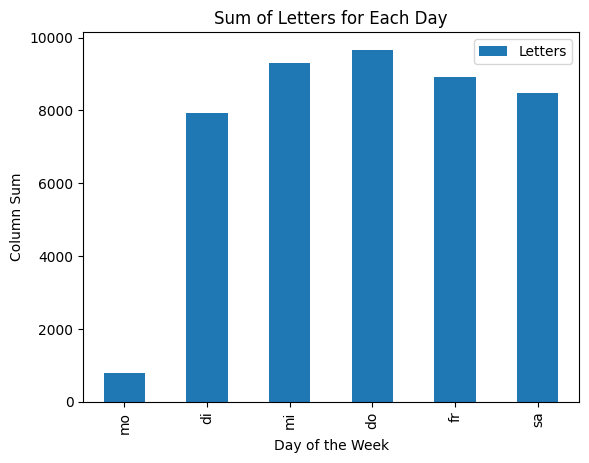

In [8]:
desired_order = ['mo', 'di', 'mi', 'do', 'fr', 'sa']
# Group the combined dataframe by day of the week and calculate the sum for multiple columns
letters_sum_df = merged_data.groupby('Days')[['Letters']].sum()
letters_sum_df = letters_sum_df.reindex(desired_order)
# Plot the column sum dataframe in a bar graph
letters_sum_df.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Sum of Letters for Each Day')
plt.xlabel('Day of the Week')
plt.ylabel('Column Sum')

# Show the plot
plt.show()

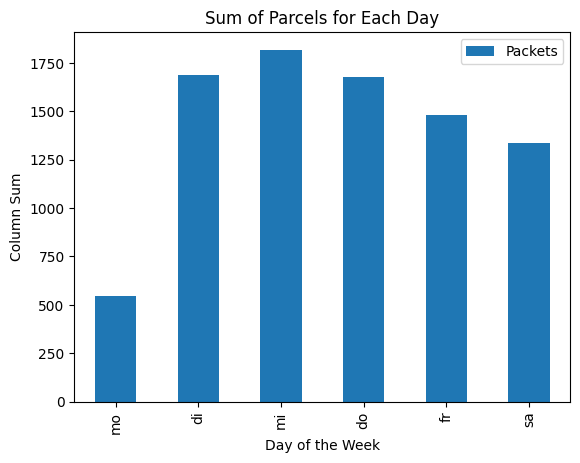

In [9]:
desired_order = ['mo', 'di', 'mi', 'do', 'fr', 'sa']
# Group the combined dataframe by day of the week and calculate the sum for multiple columns
letters_sum_df = merged_data.groupby('Days')[['Packets']].sum()
letters_sum_df = letters_sum_df.reindex(desired_order)
# Plot the column sum dataframe in a bar graph
letters_sum_df.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Sum of Parcels for Each Day')
plt.xlabel('Day of the Week')
plt.ylabel('Column Sum')

# Show the plot
plt.show()

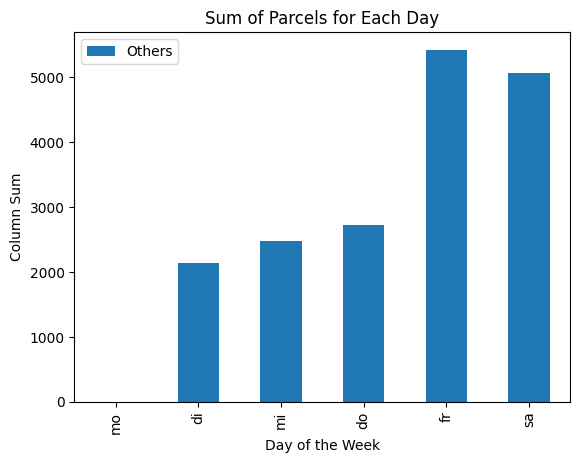

In [10]:
desired_order = ['mo', 'di', 'mi', 'do', 'fr', 'sa']
# Group the combined dataframe by day of the week and calculate the sum for multiple columns
letters_sum_df = merged_data.groupby('Days')[['Others']].sum()
letters_sum_df = letters_sum_df.reindex(desired_order)
# Plot the column sum dataframe in a bar graph
letters_sum_df.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Sum of Parcels for Each Day')
plt.xlabel('Day of the Week')
plt.ylabel('Column Sum')

# Show the plot
plt.show()